In [37]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
from sklearn.datasets import load_digits
MNIST = load_digits()

In [57]:
MNIST

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

In [58]:
X = MNIST.data
y = MNIST.target
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [59]:
def draw_digit(Img, digit_true, digit_pred = ''):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.reshape(Img, (8, 8)), interpolation = 'nearest')
    plt.text(0, 7, str(digit_true), color = 'b')
    plt.text(0, 1, str(digit_pred), color = 'r')
    plt.set_cmap('binary')

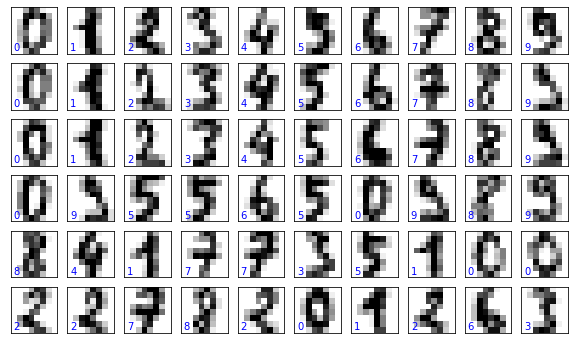

In [61]:
plt.figure(figsize = (10, 6))
for i in range(60):
    plt.subplot(6, 10, i + 1)
    draw_digit(X[i, :], y[i])

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 7)
N_test, _ = X_test.shape

Многоуровневый перцептрон (MLP)
from https://github.com/NikolaiZolotykh/MachineLearningCourse/blob/master/14.%20MLP%20-%20Распознавание%20рукописных%20цифр.ipynb




In [65]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (100,),
                          solver = 'lbfgs', 
                          activation = 'logistic',
                          random_state = 42)

In [66]:
%%time
mlp_model.fit(X_train, y_train)

CPU times: user 493 ms, sys: 234 ms, total: 728 ms
Wall time: 390 ms


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

array([3])

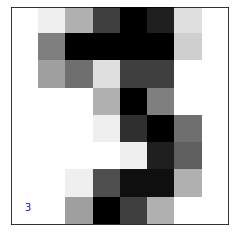

In [68]:
No = 42
Img = X_test[No, :]
dig = y_test[No]
draw_digit(Img, dig)
mlp_model.predict([Img])

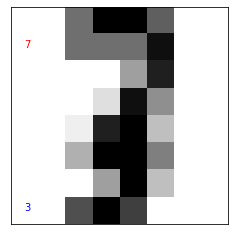

In [69]:
No = 92
Img = X_test[No, :]
dig = y_test[No]
dig_pred = mlp_model.predict([Img])[0]
draw_digit(Img, dig, dig_pred)

In [70]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [71]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0 0.05387205387205387


In [72]:
from sklearn.metrics import accuracy_score

In [73]:
accuracy_score(y_train, y_train_pred)

1.0

In [74]:
accuracy_score(y_test, y_test_pred)

0.9461279461279462

In [75]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

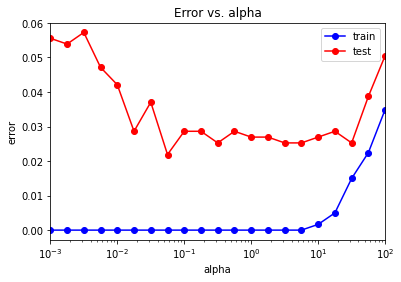

In [76]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

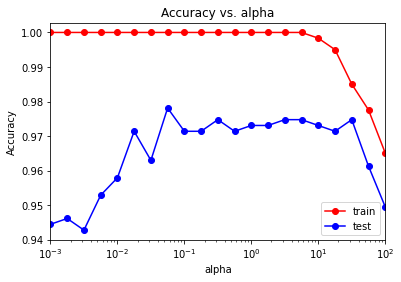

In [77]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

In [78]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.021885521885521887


In [79]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.05623413]


In [80]:
alpha_opt = alpha_opt[0]

In [81]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.0
0.021885521885521887


In [82]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[62  0  0  0  0  0  0  0  0  0]
 [ 0 57  0  0  0  0  0  0  2  0]
 [ 0  0 57  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  0  0  0]
 [ 1  0  0  0 63  0  1  0  0  0]
 [ 0  0  0  2  0 51  0  0  1  2]
 [ 0  0  0  0  0  0 55  0  1  0]
 [ 0  0  0  0  1  0  0 58  1  0]
 [ 0  0  0  0  0  0  0  0 64  0]
 [ 0  0  0  1  0  0  0  0  0 60]]


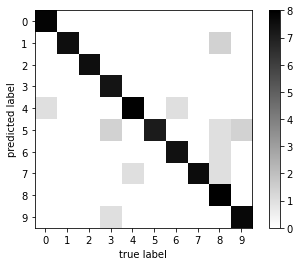

In [83]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

In [84]:
from sklearn.metrics import plot_confusion_matrix

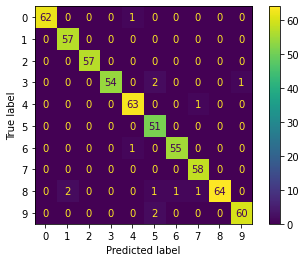

In [85]:
plot_confusion_matrix(mlp_model, X_test, y_test)

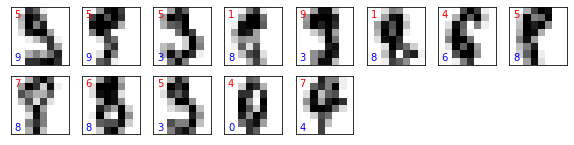

In [86]:
plt.figure(figsize = (10, 10))
i_subplot = 1 
for i in range(N_test):
    Img = X_test[i, :]
    dig = y_test[i]
    dig_pred = mlp_model.predict([Img])[0]
    if dig_pred != dig:
        plt.subplot(8, 8, i_subplot)
        draw_digit(Img, dig, dig_pred)
        i_subplot += 1